#coupon for daily food

Estimated GATE for Cluster 1: 19.542
Estimated GATE for Cluster 2: 8.746
Estimated GATE for Cluster 3: 16.509
Estimated GATE for Cluster 4: 27.294
Estimated GATE for Cluster 5: 49.792
Estimated GATE for Cluster 6: 40.272


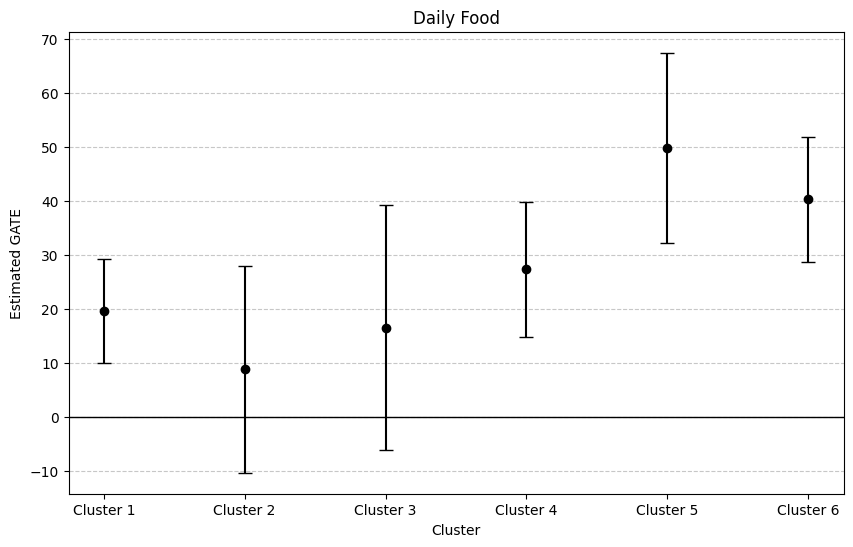

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy.stats import sem, t

# Load the dataset
df = pd.read_csv('customer_transaction_different_coupons_Daily Food.csv')

# Define features, treatment, and outcome
features = ['age_range', 'rented', 'family_size', 'income_bracket']
X = df[features]
T = df['coupon_id']
Y = df['avg_daily_expenditures']
clusters = df['cluster']  # Assuming 'cluster' contains the cluster information

# Split data into train and test sets
X_train, X_test, T_train, T_test, Y_train, Y_test, clusters_train, clusters_test = train_test_split(
    X, T, Y, clusters, test_size=0.2, random_state=42
)

# Initialize dictionary to store CATE results
gate_dict = {}
ci_dict = {}

# Calculate GATE for each cluster
for i in range(1, 7):
    # Filter training data for the current cluster
    cluster_train_mask = (clusters_train == i)
    X_cluster_train = X_train[cluster_train_mask]
    T_cluster_train = T_train[cluster_train_mask]
    Y_cluster_train = Y_train[cluster_train_mask]

    # Filter testing data for the current cluster
    cluster_test_mask = (clusters_test == i)
    X_cluster_test = X_test[cluster_test_mask]
    T_cluster_test = T_test[cluster_test_mask]
    Y_test_cluster = Y_test[cluster_test_mask]

    # Step 1: Estimate propensity score using logistic regression
    propensity_model = LogisticRegression()
    propensity_model.fit(X_cluster_train, T_cluster_train)
    propensity_scores_test = propensity_model.predict_proba(X_cluster_test)[:, 1]

    # Step 2: Trim propensity scores to avoid extreme values
    trim_lower = 0.01
    trim_upper = 0.99
    propensity_scores_test = np.clip(propensity_scores_test, trim_lower, trim_upper)

    # Step 3: Estimate outcome models for treated and untreated groups
    outcome_model_treated = xgb.XGBRegressor(n_estimators=350, max_depth=8, learning_rate=1e-2, n_jobs=-1, tree_method="hist")
    outcome_model_untreated = xgb.XGBRegressor(n_estimators=350, max_depth=8, learning_rate=1e-2, n_jobs=-1, tree_method="hist")

    outcome_model_treated.fit(X_cluster_train[T_cluster_train == 1], Y_cluster_train[T_cluster_train == 1])
    outcome_model_untreated.fit(X_cluster_train[T_cluster_train == 0], Y_cluster_train[T_cluster_train == 0])

    # Step 4: Predict outcomes
    Y_test_pred_1 = outcome_model_treated.predict(X_cluster_test)
    Y_test_pred_0 = outcome_model_untreated.predict(X_cluster_test)

    # Step 5: Calculate AIPW for the test set
    aipw_test = (T_cluster_test * (Y_test_cluster - Y_test_pred_1) / propensity_scores_test) - \
                ((1 - T_cluster_test) * (Y_test_cluster - Y_test_pred_0) / (1 - propensity_scores_test)) + \
                Y_test_pred_1 - Y_test_pred_0

    # Calculate the average treatment effect (GATE) for the current cluster
    GATE = np.mean(aipw_test)
    gate_dict[i] = GATE
    print(f"Estimated GATE for Cluster {i}: {GATE:.3f}")

    # Calculate 95% confidence interval
    ci = sem(aipw_test) * t.ppf((1 + 0.95) / 2, len(aipw_test) - 1)
    ci_dict[i] = ci

# Prepare data for plotting
gate_results = [gate_dict[i] for i in range(1, 7)]
ci_results = [ci_dict[i] for i in range(1, 7)]

# Plot GATE for each cluster with 95% confidence intervals
plt.figure(figsize=(10, 6))

# Add a horizontal line at y=0
plt.axhline(0, color='black', linestyle='-', linewidth=1)

# Plot the GATE with error bars
plt.errorbar(range(1, 7), gate_results, yerr=ci_results, fmt='o', color='black', capsize=5)

plt.xlabel('Cluster')
plt.ylabel('Estimated GATE')
plt.title('Daily Food')
plt.xticks(range(1, 7), [f'Cluster {i}' for i in range(1, 7)])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#coupon for health & personal care

Estimated GATE for Cluster 1: 15.617
Estimated GATE for Cluster 2: 5.092
Estimated GATE for Cluster 3: 7.412
Estimated GATE for Cluster 4: 6.345
Estimated GATE for Cluster 5: 19.088
Estimated GATE for Cluster 6: 13.285


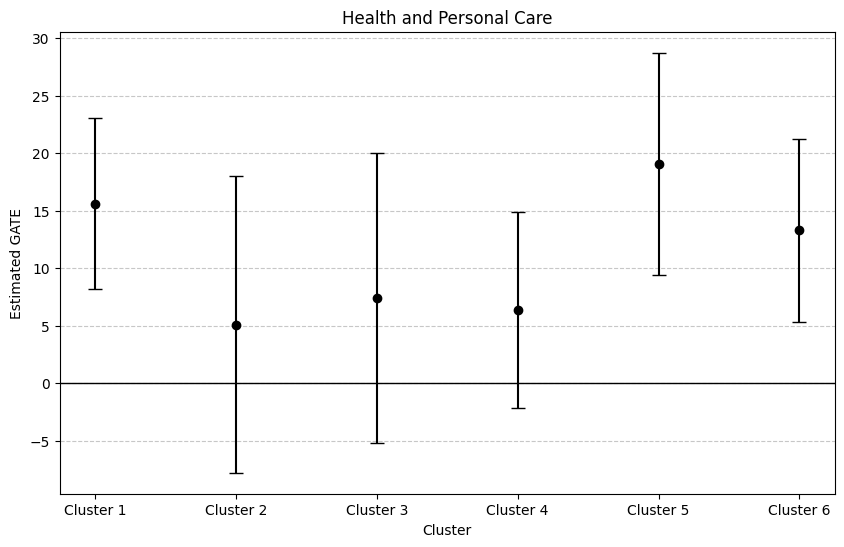

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy.stats import sem, t

# Load the dataset
df = pd.read_csv('customer_transaction_different_coupons_Health and Personal Care.csv')

# Define features, treatment, and outcome
features = ['age_range', 'rented', 'family_size', 'income_bracket']
X = df[features]
T = df['coupon_id']
Y = df['avg_daily_expenditures']
clusters = df['cluster']  # Assuming 'cluster' contains the cluster information

# Split data into train and test sets
X_train, X_test, T_train, T_test, Y_train, Y_test, clusters_train, clusters_test = train_test_split(
    X, T, Y, clusters, test_size=0.2, random_state=42
)

# Initialize dictionary to store CATE results
gate_dict = {}
ci_dict = {}

# Calculate GATE for each cluster
for i in range(1, 7):
    # Filter training data for the current cluster
    cluster_train_mask = (clusters_train == i)
    X_cluster_train = X_train[cluster_train_mask]
    T_cluster_train = T_train[cluster_train_mask]
    Y_cluster_train = Y_train[cluster_train_mask]

    # Filter testing data for the current cluster
    cluster_test_mask = (clusters_test == i)
    X_cluster_test = X_test[cluster_test_mask]
    T_cluster_test = T_test[cluster_test_mask]
    Y_test_cluster = Y_test[cluster_test_mask]

    # Step 1: Estimate propensity score using logistic regression
    propensity_model = LogisticRegression()
    propensity_model.fit(X_cluster_train, T_cluster_train)
    propensity_scores_test = propensity_model.predict_proba(X_cluster_test)[:, 1]

    # Step 2: Trim propensity scores to avoid extreme values
    trim_lower = 0.01
    trim_upper = 0.99
    propensity_scores_test = np.clip(propensity_scores_test, trim_lower, trim_upper)

    # Step 3: Estimate outcome models for treated and untreated groups
    outcome_model_treated = xgb.XGBRegressor(n_estimators=350, max_depth=8, learning_rate=1e-2, n_jobs=-1, tree_method="hist")
    outcome_model_untreated = xgb.XGBRegressor(n_estimators=350, max_depth=8, learning_rate=1e-2, n_jobs=-1, tree_method="hist")

    outcome_model_treated.fit(X_cluster_train[T_cluster_train == 1], Y_cluster_train[T_cluster_train == 1])
    outcome_model_untreated.fit(X_cluster_train[T_cluster_train == 0], Y_cluster_train[T_cluster_train == 0])

    # Step 4: Predict outcomes
    Y_test_pred_1 = outcome_model_treated.predict(X_cluster_test)
    Y_test_pred_0 = outcome_model_untreated.predict(X_cluster_test)

    # Step 5: Calculate AIPW for the test set
    aipw_test = (T_cluster_test * (Y_test_cluster - Y_test_pred_1) / propensity_scores_test) - \
                ((1 - T_cluster_test) * (Y_test_cluster - Y_test_pred_0) / (1 - propensity_scores_test)) + \
                Y_test_pred_1 - Y_test_pred_0

    # Calculate the average treatment effect (GATE) for the current cluster
    GATE = np.mean(aipw_test)
    gate_dict[i] = GATE
    print(f"Estimated GATE for Cluster {i}: {GATE:.3f}")

    # Calculate 95% confidence interval
    ci = sem(aipw_test) * t.ppf((1 + 0.95) / 2, len(aipw_test) - 1)
    ci_dict[i] = ci

# Prepare data for plotting
gate_results = [gate_dict[i] for i in range(1, 7)]
ci_results = [ci_dict[i] for i in range(1, 7)]

# Plot GATE for each cluster with 95% confidence intervals
plt.figure(figsize=(10, 6))

# Add a horizontal line at y=0
plt.axhline(0, color='black', linestyle='-', linewidth=1)

# Plot the GATE with error bars
plt.errorbar(range(1, 7), gate_results, yerr=ci_results, fmt='o', color='black', capsize=5)

plt.xlabel('Cluster')
plt.ylabel('Estimated GATE')
plt.title('Health and Personal Care')
plt.xticks(range(1, 7), [f'Cluster {i}' for i in range(1, 7)])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#coupon for special & ready-to-eat food

Estimated GATE for Cluster 1: 1.826
Estimated GATE for Cluster 2: 6.477
Estimated GATE for Cluster 3: 14.873
Estimated GATE for Cluster 4: 9.130
Estimated GATE for Cluster 5: 26.218
Estimated GATE for Cluster 6: 8.830


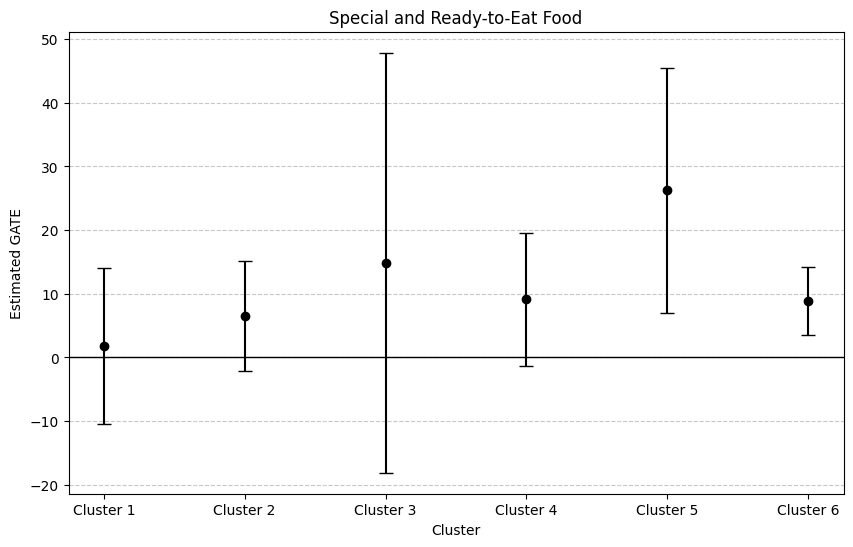

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy.stats import sem, t

# Load the dataset
df = pd.read_csv('customer_transaction_different_coupons_Special and Ready-to-Eat Food.csv')

# Define features, treatment, and outcome
features = ['age_range', 'rented', 'family_size', 'income_bracket']
X = df[features]
T = df['coupon_id']
Y = df['avg_daily_expenditures']
clusters = df['cluster']  # Assuming 'cluster' contains the cluster information

# Split data into train and test sets
X_train, X_test, T_train, T_test, Y_train, Y_test, clusters_train, clusters_test = train_test_split(
    X, T, Y, clusters, test_size=0.2, random_state=42
)

# Initialize dictionary to store CATE results
gate_dict = {}
ci_dict = {}

# Calculate GATE for each cluster
for i in range(1, 7):
    # Filter training data for the current cluster
    cluster_train_mask = (clusters_train == i)
    X_cluster_train = X_train[cluster_train_mask]
    T_cluster_train = T_train[cluster_train_mask]
    Y_cluster_train = Y_train[cluster_train_mask]

    # Filter testing data for the current cluster
    cluster_test_mask = (clusters_test == i)
    X_cluster_test = X_test[cluster_test_mask]
    T_cluster_test = T_test[cluster_test_mask]
    Y_test_cluster = Y_test[cluster_test_mask]

    # Step 1: Estimate propensity score using logistic regression
    propensity_model = LogisticRegression()
    propensity_model.fit(X_cluster_train, T_cluster_train)
    propensity_scores_test = propensity_model.predict_proba(X_cluster_test)[:, 1]

    # Step 2: Trim propensity scores to avoid extreme values
    trim_lower = 0.01
    trim_upper = 0.99
    propensity_scores_test = np.clip(propensity_scores_test, trim_lower, trim_upper)

    # Step 3: Estimate outcome models for treated and untreated groups
    outcome_model_treated = xgb.XGBRegressor(n_estimators=350, max_depth=8, learning_rate=1e-2, n_jobs=-1, tree_method="hist")
    outcome_model_untreated = xgb.XGBRegressor(n_estimators=350, max_depth=8, learning_rate=1e-2, n_jobs=-1, tree_method="hist")

    outcome_model_treated.fit(X_cluster_train[T_cluster_train == 1], Y_cluster_train[T_cluster_train == 1])
    outcome_model_untreated.fit(X_cluster_train[T_cluster_train == 0], Y_cluster_train[T_cluster_train == 0])

    # Step 4: Predict outcomes
    Y_test_pred_1 = outcome_model_treated.predict(X_cluster_test)
    Y_test_pred_0 = outcome_model_untreated.predict(X_cluster_test)

    # Step 5: Calculate AIPW for the test set
    aipw_test = (T_cluster_test * (Y_test_cluster - Y_test_pred_1) / propensity_scores_test) - \
                ((1 - T_cluster_test) * (Y_test_cluster - Y_test_pred_0) / (1 - propensity_scores_test)) + \
                Y_test_pred_1 - Y_test_pred_0

    # Calculate the average treatment effect (GATE) for the current cluster
    GATE = np.mean(aipw_test)
    gate_dict[i] = GATE
    print(f"Estimated GATE for Cluster {i}: {GATE:.3f}")

    # Calculate 95% confidence interval
    ci = sem(aipw_test) * t.ppf((1 + 0.95) / 2, len(aipw_test) - 1)
    ci_dict[i] = ci

# Prepare data for plotting
gate_results = [gate_dict[i] for i in range(1, 7)]
ci_results = [ci_dict[i] for i in range(1, 7)]

# Plot GATE for each cluster with 95% confidence intervals
plt.figure(figsize=(10, 6))

# Add a horizontal line at y=0
plt.axhline(0, color='black', linestyle='-', linewidth=1)

# Plot the GATE with error bars
plt.errorbar(range(1, 7), gate_results, yerr=ci_results, fmt='o', color='black', capsize=5)

plt.xlabel('Cluster')
plt.ylabel('Estimated GATE')
plt.title('Special and Ready-to-Eat Food')
plt.xticks(range(1, 7), [f'Cluster {i}' for i in range(1, 7)])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#coupon for any

Estimated GATE for Cluster 1: 5.029
Estimated GATE for Cluster 2: 8.386
Estimated GATE for Cluster 3: 13.655
Estimated GATE for Cluster 4: -1.032
Estimated GATE for Cluster 5: 17.726
Estimated GATE for Cluster 6: 13.781


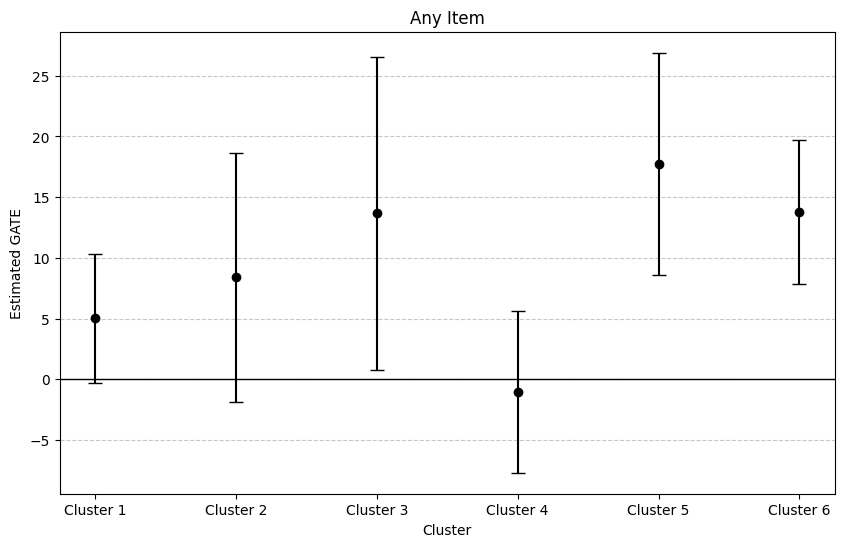

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy.stats import sem, t

# Load the dataset
df = pd.read_csv('customer_transaction_different_coupons.csv')

# Define features, treatment, and outcome
features = ['age_range', 'rented', 'family_size', 'income_bracket']
X = df[features]
T = df['coupon_id']
Y = df['avg_daily_expenditures']
clusters = df['cluster']  # Assuming 'cluster' contains the cluster information

# Split data into train and test sets
X_train, X_test, T_train, T_test, Y_train, Y_test, clusters_train, clusters_test = train_test_split(
    X, T, Y, clusters, test_size=0.2, random_state=42
)

# Initialize dictionary to store CATE results
gate_dict = {}
ci_dict = {}

# Calculate GATE for each cluster
for i in range(1, 7):
    # Filter training data for the current cluster
    cluster_train_mask = (clusters_train == i)
    X_cluster_train = X_train[cluster_train_mask]
    T_cluster_train = T_train[cluster_train_mask]
    Y_cluster_train = Y_train[cluster_train_mask]

    # Filter testing data for the current cluster
    cluster_test_mask = (clusters_test == i)
    X_cluster_test = X_test[cluster_test_mask]
    T_cluster_test = T_test[cluster_test_mask]
    Y_test_cluster = Y_test[cluster_test_mask]

    # Step 1: Estimate propensity score using logistic regression
    propensity_model = LogisticRegression()
    propensity_model.fit(X_cluster_train, T_cluster_train)
    propensity_scores_test = propensity_model.predict_proba(X_cluster_test)[:, 1]

    # Step 2: Trim propensity scores to avoid extreme values
    trim_lower = 0.01
    trim_upper = 0.99
    propensity_scores_test = np.clip(propensity_scores_test, trim_lower, trim_upper)

    # Step 3: Estimate outcome models for treated and untreated groups
    outcome_model_treated = xgb.XGBRegressor(n_estimators=350, max_depth=8, learning_rate=1e-2, n_jobs=-1, tree_method="hist")
    outcome_model_untreated = xgb.XGBRegressor(n_estimators=350, max_depth=8, learning_rate=1e-2, n_jobs=-1, tree_method="hist")

    outcome_model_treated.fit(X_cluster_train[T_cluster_train == 1], Y_cluster_train[T_cluster_train == 1])
    outcome_model_untreated.fit(X_cluster_train[T_cluster_train == 0], Y_cluster_train[T_cluster_train == 0])

    # Step 4: Predict outcomes
    Y_test_pred_1 = outcome_model_treated.predict(X_cluster_test)
    Y_test_pred_0 = outcome_model_untreated.predict(X_cluster_test)

    # Step 5: Calculate AIPW for the test set
    aipw_test = (T_cluster_test * (Y_test_cluster - Y_test_pred_1) / propensity_scores_test) - \
                ((1 - T_cluster_test) * (Y_test_cluster - Y_test_pred_0) / (1 - propensity_scores_test)) + \
                Y_test_pred_1 - Y_test_pred_0

    # Calculate the average treatment effect (GATE) for the current cluster
    GATE = np.mean(aipw_test)
    gate_dict[i] = GATE
    print(f"Estimated GATE for Cluster {i}: {GATE:.3f}")

    # Calculate 95% confidence interval
    ci = sem(aipw_test) * t.ppf((1 + 0.95) / 2, len(aipw_test) - 1)
    ci_dict[i] = ci

# Prepare data for plotting
gate_results = [gate_dict[i] for i in range(1, 7)]
ci_results = [ci_dict[i] for i in range(1, 7)]

# Plot GATE for each cluster with 95% confidence intervals
plt.figure(figsize=(10, 6))

# Add a horizontal line at y=0
plt.axhline(0, color='black', linestyle='-', linewidth=1)

# Plot the GATE with error bars
plt.errorbar(range(1, 7), gate_results, yerr=ci_results, fmt='o', color='black', capsize=5)

plt.xlabel('Cluster')
plt.ylabel('Estimated GATE')
plt.title('Any Item')
plt.xticks(range(1, 7), [f'Cluster {i}' for i in range(1, 7)])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()